# Matplotlib

In [46]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
plt.style.use('seaborn-bright')
%matplotlib inline

In [41]:
dataTypes = ['i4', 'U50', 'U50', 'f8', 'f8', 'f8']
data = np.genfromtxt("BigGValues.csv", dtype=dataTypes, delimiter=",", names=True)
data

array([(2018, 'Tiesinga (NIST)', 'CODATA-2018', 6.674300e-11, 1.5e-15, 2.2e-05),
       (2020, 'Westphal', 'Paper', 6.040000e-11, 6.0e-13, 1.0e-03),
       (1798, 'Cavendish', 'Wikipedia', 6.740000e-11, 4.0e-13, 6.0e-03),
       (1895, 'Boys & Braun', 'Wikipedia', 6.660000e-11, 1.0e-13, 2.0e-03),
       (1898, 'Richarz & Krigar-Menzel', 'Wikipedia', 6.683000e-11, 1.1e-13, 2.0e-03),
       (1930, 'Heyl', 'Wikipedia', 6.670000e-11, 5.0e-14, 1.0e-03),
       (1942, 'Heyl', 'Wikipedia', 6.673000e-11, 3.0e-14, 4.5e-04),
       (1969, 'Taylor (NIST)', 'Wikipedia', 6.673200e-11, 3.1e-14, 4.6e-04),
       (1973, 'Taylor (NIST)', 'Wikipedia', 6.672000e-11, 4.9e-14, 7.3e-04),
       (1986, 'Cohen (NIST)', 'Wikipedia', 6.674490e-11, 8.1e-15, 1.2e-04),
       (1998, 'Mohr (NIST)', 'Wikipedia', 6.673000e-11, 1.0e-13, 1.5e-03),
       (2002, 'Mohr (NIST)', 'Wikipedia', 6.674200e-11, 1.0e-14, 1.5e-04),
       (2006, 'Mohr (NIST)', 'Wikipedia', 6.674280e-11, 6.7e-15, 1.0e-04),
       (2010, 'Mohr (NIS

In [59]:
codata2018 = data['Value'][0]
Gs = data['Value'][3:]
relativeG = (codata2018 - Gs) * 10**11
years = data["Year"][3:]
xerr = data['Uncertainty'][3:] * 10**11

In [60]:
top = max(years)
bottom = min(years)
left = -data["Uncertainty"][0]*10**11
right = data["Uncertainty"][0]*10**11

print(top, bottom, left, right)
verts = [
    (left, top),
    (left, bottom),
    (right, bottom),
    (right, top),
    (left, top)
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY
]

path = Path(verts, codes)

2018 1895 -0.00015 0.00015


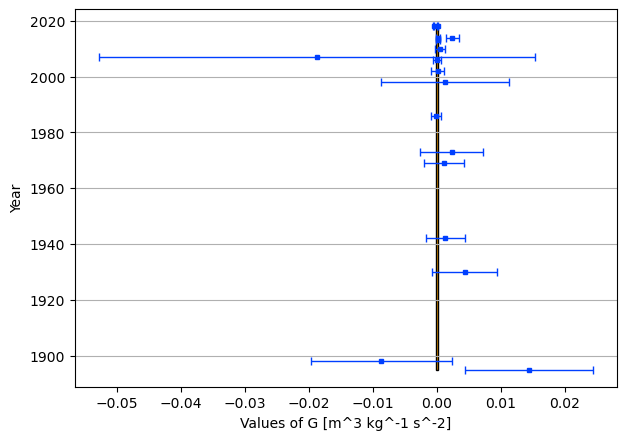

In [61]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Year")
ax1.set_xlabel("Values of G [m^3 kg^-1 s^-2]")
patch = patches.PathPatch(path, facecolor="orange")
ax1.add_patch(patch)
ax1.errorbar(relativeG, years, xerr=xerr, 
             linewidth=0, marker="s", elinewidth=1, ms=3, capsize=3)
ax1.yaxis.grid()
fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()



# Using Plotly

In [92]:
import pandas as pd
import plotly.express as px
import numpy as np
from jupyter_dash import JupyterDash
import dash as d
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output

from datetime import date
import datetime

pd.options.plotting.backend = "plotly"

external_stylesheets = [dbc.themes.BOOTSTRAP]

In [170]:
df = pd.read_csv('BigGValues.csv')
df =  df.sort_values(by="Year", ascending=False, ignore_index=True)
uqYears = df["Year"].drop_duplicates()
uqYears.sort_values(inplace=True)
uqYears.reset_index(drop=True,inplace=True)
codata2018V = df[df["Source"]=="CODATA-2018"]["Value"].loc[1]
codata2018U = df[df["Source"]=="CODATA-2018"]["Uncertainty"].loc[1] * 10**11
df["RelValue"] = (df['Value']-codata2018V)*10**11
df["AdjUncertainty"] = df["Uncertainty"]*10**11
df

,Year,Physicist,Group,Source,Value,Uncertainty,Relative Uncertainty,RelValue,AdjUncertainty
0,2020,Westphal,Uni. Vienna,Paper,6.040000e-11,6.000000e-13,0.001000,-0.634300,0.060000
1,2018,Tiesinga,Nist,CODATA-2018,6.674300e-11,1.500000e-15,0.000022,0.000000,0.000150
2,2018,Qing,-,Wikipedia,6.674840e-11,7.800000e-16,0.000012,0.000540,0.000078
3,2018,Qing,-,Wikipedia,6.674184e-11,7.800000e-16,0.000012,-0.000116,0.000078
4,2014,Rosi,-,Wikipedia,6.671910e-11,9.900000e-15,0.000150,-0.002390,0.000990
5,2014,Mohr,NIST,Wikipedia,6.674080e-11,3.100000e-15,0.000046,-0.000220,0.000310
6,2013,BIPM,BIPM,G Controversy Article,6.674080e-11,3.100000e-15,0.000046,-0.000220,0.000310
7,2010,Mohr,NIST,Wikipedia,6.673840e-11,8.000000e-15,0.000120,-0.000460,0.000800
8,2007,Fixler,-,Wikipedia,6.693000e-11,3.400000e-13,0.002800,0.018700,0.034000
9,2006,Mohr,NIST,Wikipedia,6.674280e-11,6.700000e-15,0.000100,-0.000020,0.000670


In [171]:
# rangeMarks = {year:{'label': f'{year}', 
#         'style': {'transform': 'rotate(90deg)'}} for year in uqYears}

rangeMarks = {i: f'{uqYears.loc[i]}' for i in range(len(uqYears)) }

# rangeMarks = {uqYears.loc[i]: f'{uqYears.loc[i]}' if i%3==0 else '' for i in range(len(uqYears))}

checklistOptions = [{'label': f'{df["Physicist"].loc[i]} ({df["Group"].loc[i]}) ({df["Year"].loc[i]})', 'value': df.index[i]} for i in range(len(df["Physicist"]))]

In [178]:
nistdf = df[df['Group']=='NIST']
nistPlot = px.scatter(nistdf,
                     x='Year',
                     y='AdjUncertainty',
                     labels={"AdjUncertainty": "Uncertainty x10^11"},
                     hover_data=["AdjUncertainty", 'Year', 'Physicist']
                     )

In [179]:
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([
    html.H1("Values of G Measured over Time"),
    html.Br(),
    
#     dcc.DatePickerRange(
#         id = 'date-picker',
#         display_format="YYYY",
#         start_date = date(1798,1,1),
#         end_date = date.today(),
#         min_date_allowed = date(1796,1,1)
#     ),
    dbc.Row([
        dbc.Col(html.Div(
            dcc.RangeSlider(
    #             min = uqYears.min(),
    #             max = uqYears.max(),
                id = 'year-range',
                min = 0,
                max = len(rangeMarks)-1,
                step = None,
                marks = rangeMarks,
    #             value = [uqYears.min(), uqYears.max()]
                value=[0,len(rangeMarks)-1],
                vertical=True,
                updatemode="drag"
            )
        ), width=1),
        
        dbc.Col(html.Div(
            dcc.Graph(id="plot1")
        ), width=11)
    ]),
    
    html.Br(),
    html.H1("Values of G over Time (Select Values)"),
    
    dbc.Row([
        dbc.Col(
            html.Details([
            html.Summary("Select G Measuremnts"),
            dcc.Checklist(
                id='measurementList',
                options=checklistOptions,
                value=df.index,
                labelStyle={'display': 'block'}    
                )
            ]), width=3
        ),
        dbc.Col(
            dcc.Graph(id="plot2"),
            width = 9
        )
    ]),
    
    html.H1("NIST Uncertainty over Time"),
    dcc.Graph(figure=nistPlot)
    
])

@app.callback(
    Output('plot1', 'figure'),
    [Input('year-range', 'drag_value')]
)
def bigGYearPlot(value):
    
    dff = df.copy()
    startYear = int(rangeMarks[value[0]])
    endYear = int(rangeMarks[value[1]])
    dff = dff[ (startYear <= dff["Year"]) & (dff["Year"] <= endYear) ]
    
    fig = px.scatter(dff, 
                     x='RelValue', y="Year", error_x="AdjUncertainty",
                     labels = {
                         "RelValue": "Relative Value"
                     },
                     hover_data=['RelValue', "Year", 'Physicist', 'Group']
                    )
    fig.add_vrect(x0=-codata2018U, x1=codata2018U, fillcolor='green', opacity=0.2)
    
    return fig

@app.callback(
    Output('plot2', 'figure'),
    [Input('measurementList', 'value')]
)
def bigGPersonPlot(value):
    
    dff = df.copy()
    dff = dff.iloc[value]
    
    fig = px.scatter(dff, 
                     x='RelValue', y="Year", error_x="AdjUncertainty",
                     labels = {
                         "RelValue": "Relative Value"
                     },
                     hover_data=['RelValue', "Year", 'Physicist', 'Group']
                    )
    fig.add_vrect(x0=-codata2018U, x1=codata2018U, fillcolor='green', opacity=0.2)
    
    return fig
    
    

In [180]:
app.run_server(mode='jupyterlab', port=8090, dev_tools_ui=True, debug=True,
              dev_tools_hot_reload=True, threaded=True)

In [6]:
{year:{'label': f'{year}' if year != 1798 else "Cavendish", 
        'style': {'transform': 'rotate(90deg)'}} for year in uqYears}

In [21]:
uqYears.sort_values()

2     1798
3     1895
4     1898
5     1930
6     1942
7     1969
8     1973
9     1986
10    1998
11    2002
12    2006
16    2007
13    2010
15    2013
14    2014
0     2018
1     2020
Name: Year, dtype: int64

In [47]:
df[(1895 <= df["Year"]) & (df["Year"] <= 1950)]

,Year,Physicist,Source,Value,Uncertainty,Relative Uncertainty
3,1895,Boys & Braun,Wikipedia,6.660000e-11,1.000000e-13,0.00200
4,1898,Richarz & Krigar-Menzel,Wikipedia,6.683000e-11,1.100000e-13,0.00200
5,1930,Heyl,Wikipedia,6.670000e-11,5.000000e-14,0.00100
6,1942,Heyl,Wikipedia,6.673000e-11,3.000000e-14,0.00045
